# Project 150– Resume Classification by Group 2

In [1]:
#installing texttract to extract text from documents
!pip install textract

In [2]:
#importing libraries
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
import re
import numpy as np
import os
import textract as tr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
from wordcloud import WordCloud
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Extracting data from the resumes

In [3]:
file_path = r"C:\Users\Admin\Desktop\Project 2\Resumes"
extracted_data = []
software_names = []
def extract_data(file_path):
    for file in os.listdir(file_path):
        if file == 'Reactjs developer':
            final = os.path.join(file_path, file)
            for data in os.listdir(final):
                if data.endswith('.docx') :
                    final_path = os.path.join(final, data)
                    extracted_data.append((tr.process(final_path)).decode('utf-8'))
                    software_names.append(file)
        elif file == 'Peoplesoft resumes':
            final = os.path.join(file_path, file)
            for data in os.listdir(final) :
                if data.endswith('.docx') :
                    final_path = os.path.join(final, data)
                    extracted_data.append((tr.process(final_path)).decode('utf-8'))
                    software_names.append(file)
        elif file == 'SQL Developer Lightning insight' :
            final = os.path.join(file_path, file)
            for data in os.listdir(final) :
                final_path = os.path.join(final, data)
                extracted_data.append((tr.process(final_path)).decode('utf-8'))
                software_names.append(file)
        elif file == 'workday resumes':
            final = os.path.join(file_path, file)
            for data in os.listdir(final) :
                final_path = os.path.join(final, data)
                extracted_data.append((tr.process(final_path)).decode('utf-8'))
                software_names.append(file)

In [4]:
extract_data(file_path)

In [5]:
len(extracted_data)

79

In [6]:
data = pd.DataFrame()
data['resumes'] = extracted_data
data['category'] = software_names

In [7]:
data.head()

,resumes,category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft resumes
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft resumes


### EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resumes   79 non-null     object
 1   category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [9]:
data.shape

(79, 2)

In [10]:
data.isnull().sum()

resumes     0
category    0
dtype: int64

In [11]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 79, dtype: bool

In [12]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)
data['resumes']=data.resumes.apply(lambda x: preprocess(x))

In [14]:
data.head()

,resumes,category
0,anubhav kumar singh core competencies scriptin...,Peoplesoft resumes
1,ananda rayudu ananda rayudu profile summary ye...,Peoplesoft resumes
2,peoplesoft database administrator gangareddy p...,Peoplesoft resumes
3,classification internal classification interna...,Peoplesoft resumes
4,priyanka ramadoss mountpleasant coonoor nilgir...,Peoplesoft resumes


#### Lets explore the preprocessed and cleaned data. Textual data can be explored using Word Clouds. These are visual representations of the frequency of different words present in text. Importance of words are represented by size of the word. Bigger size represents more frequently occuring words.

In [15]:
#Data Exploration
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('experience', 600), ('peoplesoft', 453), ('workday', 432), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 327), ('reports', 326), ('sql', 281), ('business', 273), ('web', 251), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 173), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('technical', 164), ('working', 162), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('developer', 141), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


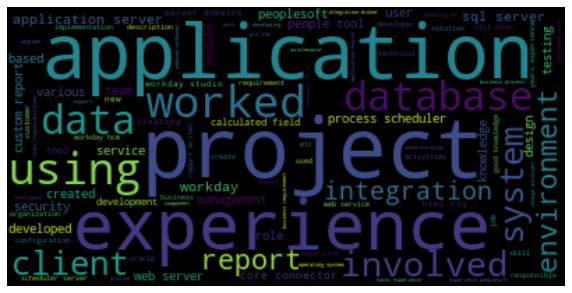

In [16]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (data['category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Reactjs developer                  24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: category, dtype: int64


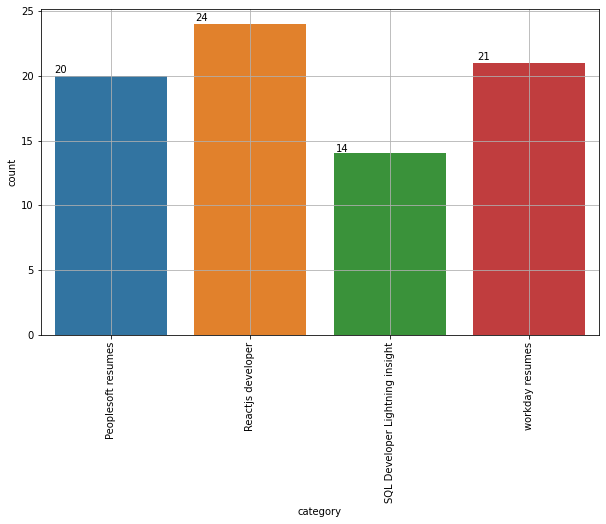

In [18]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax=sns.countplot(x="category", data=data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

##### from this count plot we can understand that there are 4 job categories and within that most of the resumes are from reactjs devolopers and less number of resumes from sql developers

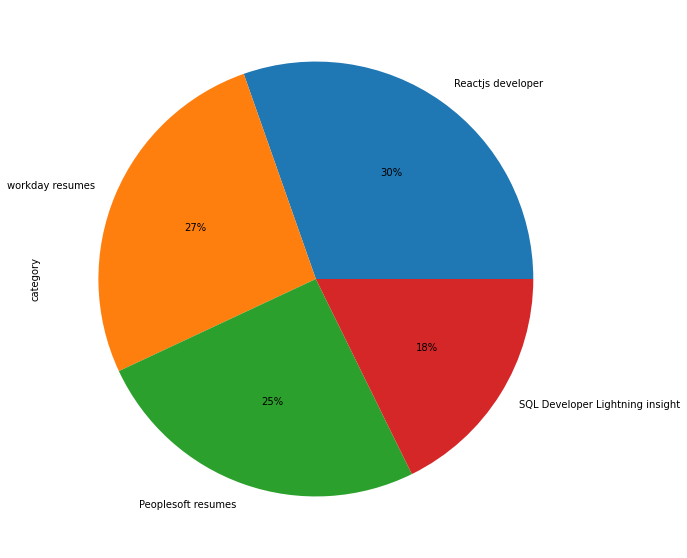

In [19]:
plt.figure(figsize=(20,10))
data['category'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

##### from this pie chart we can understand that there are 4 job categories and we can understand their counts as percentage

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


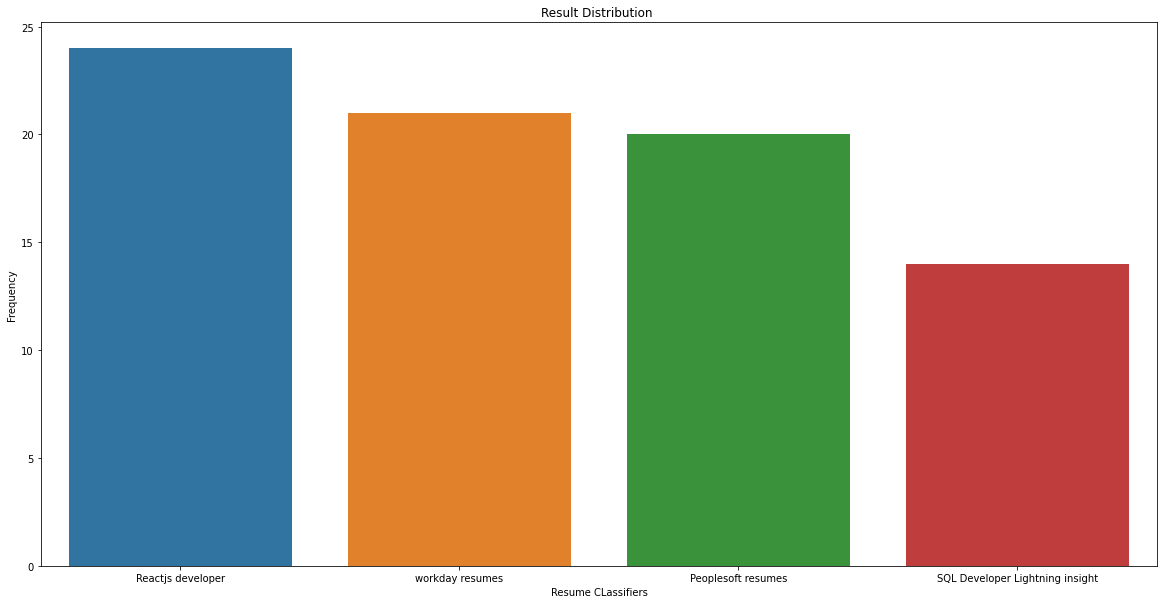

In [20]:
from six import text_type
x=data['category'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x.index,x.values)
plt.title('Result Distribution ')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Resume CLassifiers', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [22]:
data['category'].value_counts()

1    24
3    21
0    20
2    14
Name: category, dtype: int64

In [23]:
data

,resumes,category
0,anubhav kumar singh core competencies scriptin...,0
1,ananda rayudu ananda rayudu profile summary ye...,0
2,peoplesoft database administrator gangareddy p...,0
3,classification internal classification interna...,0
4,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...
74,workday integration consultant name sri krishn...,3
75,srikanth workday hcm consultant seeking suitab...,3
76,workday hcm fcm name kumar role workday consul...,3
77,venkateswarlu workday consultant professional ...,3


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [25]:
requiredText = data['resumes'].values
requiredTarget = data['category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
tfidf=word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

x_train,x_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=14, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(x_train.shape)
print(x_test.shape)

Feature completed .....
(63, 4348)
(16, 4348)


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

### Naive bayes classifier

In [27]:
clf = MultinomialNB()
NB=clf.fit(x_train,y_train)
prediction1=NB.predict(x_test)
prediction2=NB.predict(x_train)
print("ACCURACY OF THE MODEL ON TRAIN DATA: ", accuracy_score(y_train, prediction2))
print(classification_report(y_train, prediction2))
print(confusion_matrix(y_train, prediction2))
print("ACCURACY OF THE MODEL ON TEST DATA: ", accuracy_score(y_test, prediction1))
print(classification_report(y_test, prediction1))
print(confusion_matrix(y_test, prediction1))

ACCURACY OF THE MODEL ON TRAIN DATA:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL ON TEST DATA:  0.875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.33      0.50         3
           3       0.80      1.00      0.89         4

    accuracy                           0.88        16
   macro avg       0.91      0.83      0.82        16
weighted avg       0.90      0.88      

### Logistic Regression

In [28]:
lr = LogisticRegression()
LOG=lr.fit(x_train,y_train)
prediction3=LOG.predict(x_test)
prediction4=LOG.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction4))
print(classification_report(y_train, prediction4))
print(confusion_matrix(y_train, prediction4))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction3))
print(classification_report(y_test, prediction3))
print(confusion_matrix(y_test, prediction3))

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  0.875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.71      1.00      0.83         5
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.83      0.83        16
weighted avg       0.91      0.88      

### DecisionTree Classifier

In [29]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

print(clf)
DTree=clf.fit(x_train,y_train)
prediction5=DTree.predict(x_test)
prediction6=DTree.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction6))
print(classification_report(y_train, prediction6))
print(confusion_matrix(y_train, prediction6))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction5))
print(classification_report(y_test, prediction5))
print(confusion_matrix(y_test, prediction5))

DecisionTreeClassifier(max_depth=20)
ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  0.8125
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.40      0.57         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.89      0.85      0.82        16
w

### RandomForest classifier

In [30]:
modelr= RandomForestClassifier( )
modelr.fit(x_train,y_train)
prediction7=modelr.predict(x_test)
prediction8=modelr.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction8))
print(classification_report(y_train, prediction8))
print(confusion_matrix(y_train, prediction8))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction7))
print(classification_report(y_test, prediction7))
print(confusion_matrix(y_test, prediction7))

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.

### AdaBoost Classifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=20 ,learning_rate=0.01)
 

AB=ad.fit(x_train,y_train)
prediction9=AB.predict(x_test)
prediction10=AB.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction10))
print(classification_report(y_train, prediction10))
print(confusion_matrix(y_train, prediction10))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction9))
print(classification_report(y_test, prediction9))
print(confusion_matrix(y_test, prediction9))

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  0.8125
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.40      0.57         5
           2       0.50      1.00      0.67         3
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.88      0.85      0.81        16
weighted avg       0.91      0.81     

### GradientBoosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=20 ,learning_rate=0.01)

 
GB=clf.fit(x_train,y_train)
prediction11=GB.predict(x_test)
prediction12=GB.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction12))
print(classification_report(y_train, prediction12))
print(confusion_matrix(y_train, prediction12))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction11))
print(classification_report(y_test, prediction11))
print(confusion_matrix(y_test, prediction11))

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.